In [1]:
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=xx, n_classes=xx, n_features=xx, n_redundant=xx, random_state=xx)

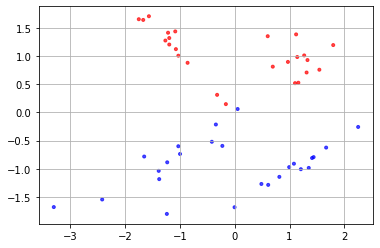

In [2]:
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

X, y = make_classification(n_samples=50, n_features=2,
                           n_redundant=0, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="bwr"), alpha=0.7)
plt.grid(True)
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# model = Classifier() 모델 지정
# model.fit(train_X, train_y,) 모델 학습
# model.predict(test_X) 예측
# model.score(test_X, test_Y) 정확도 측정

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(train_X, train_y)
pred_y = model.predict(test_X)
print(pred_y)
print(model.score(test_X, test_y))

[0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
0.96


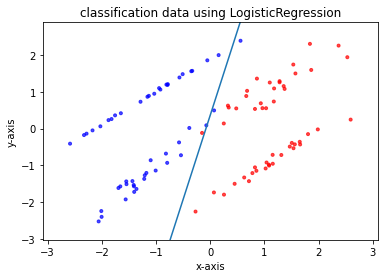

In [18]:
import numpy as np
%matplotlib inline

X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model = LogisticRegression()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

# 데이터 플롯
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="bwr"), alpha=0.7)

# 경계선 플롯
Xi = np.linspace(-10, 10)
Y = -model.coef_[0][0] / model.coef_[0][1] * \
    Xi - model.intercept_ / model.coef_[0][1]
plt.plot(Xi, Y)

# 그래프 스케일 조정
plt.xlim(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
plt.ylim(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5) 
# plt.axes().set_aspect("equal", "datalim")
# 위 코드 문제 원인 알아보기

plt.title("classification data using LogisticRegression")

plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [24]:
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model = LinearSVC()
model.fit(train_X, train_y)
print(model.score(test_X, test_y))

1.0


1.0


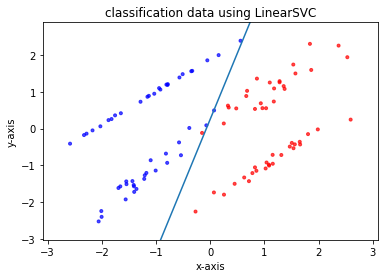

In [26]:
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model = LinearSVC()
model.fit(train_X, train_y)
print(model.score(test_X, test_y))

plt.scatter(X[:, 0], X[:, 1], c=y, marker=".", cmap=matplotlib.cm.get_cmap(name="bwr"), alpha=0.7)

Xi = np.linspace(-10, 10)
Y = -model.coef_[0][0] / model.coef_[0][1] * \
    Xi - model.intercept_ / model.coef_[0][1]

plt.plot(Xi, Y)

plt.xlim(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
plt.ylim(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)

plt.title("classification data using LinearSVC")

plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [27]:
from sklearn.datasets import make_gaussian_quantiles

data, label = make_gaussian_quantiles(
    n_samples=1000, n_classes=2, n_features=2, random_state=42)

model = SVC()
model.fit(data, label)

print(model.score(data, label))

0.99


In [28]:
X, y = make_gaussian_quantiles(n_samples=1000, n_classes=2, n_features=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model1 = SVC()
model2 = LinearSVC()

model1.fit(train_X, train_y)
model2.fit(train_X, train_y)

print(f"LonLinear SVC: {model1.score(test_X, test_y)}")
print(f"Linear SVC: {model2.score(test_X, test_y)}")

LonLinear SVC: 0.976
Linear SVC: 0.528


In [34]:
import requests
import zipfile
from io import StringIO
import io
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

mush_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(mush_data_url).content

mush_data = pd.read_csv(io.StringIO(s.decode("utf-8")), header=None)

mush_data.columns = ["classes", "cap_shape", "cap_surface",
                     "cap_color", "odor", "bruises",
                     "gill_attachment", "gill_spacing",
                     "gill_size", "gill_color", "stalk_shape",
                     "stalk_root", "stalk_surface_above_ring",
                     "stalk_surface_below_ring",
                     "stalk_color_above_ring",
                     "stalk_color_below_ring",
                     "veil_type", "veil_color","ring_number",
                     "ring_type", "spore_print_color",
                     "population", "habitat"]

mush_data_dummy = pd.get_dummies(
    mush_data[["gill_color", "gill_attachment", "odor", "cap_color"]])

mush_data_dummy["flg"] = mush_data["classes"].map(
    lambda x: 1 if x == "p" else 0
)

X = mush_data_dummy.drop("flg", axis=1)
Y = mush_data_dummy["flg"]

train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=42)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(train_X, train_y)

print(model.score(test_X, test_y))

0.9094042343673068


In [35]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model2 = DecisionTreeClassifier()

model1.fit(train_X, train_y)
model2.fit(train_X, train_y)

print(model1.score(test_X, test_y))
print(model2.score(test_X, test_y))

0.9094042343673068
0.9094042343673068
